<a href="https://colab.research.google.com/github/ucfilho/marquesgabi_Julho_2020_using/blob/master/Segmentacao_e_leitura_FotoS_v_03_julho_21_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import zipfile
#import random
from random import randint
from PIL import Image
import re
from sklearn.model_selection import train_test_split
#import scikit-image
import skimage
import pandas as pd

In [2]:
# Import the 'transform' module from 'skimage'
from skimage import transform 

In [3]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

In [4]:
!git clone https://github.com/ucfilho/marquesgabi_Julho_2020
%cd marquesgabi_Julho_2020
Transfere='Maria_Gabriela_Segmenta_FotosGrandes.zip'
file_name = zipfile.ZipFile(Transfere, 'r')
file_name.extractall()

fatal: destination path 'marquesgabi_Julho_2020' already exists and is not an empty directory.
/content/marquesgabi_Julho_2020


In [5]:
# First step: get the segmented file (photos stored in csv file)

# First step: get the segmented file (photos stored in csv file)

In [6]:
labels = [] #name files

with zipfile.ZipFile(Transfere, "r") as f:
  for f in f.namelist():
    labels.append(f)

In [7]:
df=pd.read_csv(labels[0])
y_PC=df['Type']

In [8]:
df_teste=pd.read_csv(labels[2])
print(df_teste.head())

   Unnamed: 0  Width Type          0  ...       780       781        782        783
0           0    157    I   71.90012  ...  49.57118  35.95513    7.75954    1.03862
1           1    124    I  127.06763  ...  94.57544  98.71695  100.52861  100.84391
2           2    182    G   87.10651  ...   5.33136   5.84024    5.89941    5.65089
3           3    101    I   99.01176  ...  35.15087  41.39006   43.76875   44.09146
4           4    183    I   56.30844  ...  52.96656  53.65711   53.44656   53.11703

[5 rows x 787 columns]


In [9]:
Fotos=df.drop(['Unnamed: 0','Type','Width'], axis=1)

In [10]:
print(np.array(Fotos).shape )

(36, 784)


# Second step: create the ann to evaluate which is a grain in photos segmented


In [11]:
!git clone https://github.com/marquesgabi/Doutorado
%cd Doutorado
Transfere='Fotos9Amostras720_e_varios_graos.zip'
file_name = zipfile.ZipFile(Transfere, 'r')
file_name.extractall()

fatal: destination path 'Doutorado' already exists and is not an empty directory.
/content/marquesgabi_Julho_2020/Doutorado


In [12]:
#Construção da rede com as fotos já recortadas anteriormente
labels = [] #882 imagens recortadas por nós
images = [] #882 imagens lidas no formato de lista 
with zipfile.ZipFile(Transfere, "r") as f:
  for f in f.namelist():
    images.append(cv2.imread(f))
    labels.append(f)

In [13]:
# Rescale the images in the 'images' array
images28 = [transform.resize(image, (28, 28)) for image in images]

In [14]:
print(images28[0].shape)

(28, 28, 3)


In [15]:
# Import 'rgb2gray' from 'skimage.color'
from skimage.color import rgb2gray

# Convert 'images28' to an array
images28 = np.array(images28)

# Convert 'images28' to grayscale
images28 = rgb2gray(images28)

In [16]:
y_valor=[]

img_name=labels

Graos='G' # numero 1
Indef='I' # numero 2
Buraco='B' # numero 3
Varios='V' # numero 4

for x in img_name:
  if re.search(Graos, x):
    y_valor.append(1)
  elif re.search(Indef, x):
    y_valor.append(2)
  elif re.search(Buraco, x):
    y_valor.append(3)
  else:
    y_valor.append(4)
    
print(y_valor)
print(len(y_valor))

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 3, 3, 3, 

In [17]:
# new idea improving the discussion "what is a grain?" 
# 
!git clone https://github.com/ucfilho/marquesgabi_Julho_2020
%cd marquesgabi_Julho_2020
Transfere='Fotos9Amostras_teste_jul_2020.zip'
file_name = zipfile.ZipFile(Transfere, 'r')
file_name.extractall()
#Construção da rede com as fotos já recortadas anteriormente
labels = [] #882 imagens recortadas por nós
images = [] #882 imagens lidas no formato de lista 
with zipfile.ZipFile(Transfere, "r") as f:
  for f in f.namelist():
    images.append(cv2.imread(f))
    labels.append(f)

fatal: destination path 'marquesgabi_Julho_2020' already exists and is not an empty directory.
/content/marquesgabi_Julho_2020/Doutorado/marquesgabi_Julho_2020


In [42]:
#for i in labels:
#  print(i)
#different_type=['B','V','N','I']

img_name=labels

Graos='G' # numero 1
Indef='I' # numero 2
Buraco='B' # numero 3
Varios='V' # numero 4
NaoGrao='N' # numero 5
y_new_valor=[]
y_G=[]; y_N=[]; y_I=[]; y_B=[]; y_V=[]

for x in img_name:
  if re.search(Graos, x):
    y_new_valor.append(1)
    y_G.append(x)
  elif re.search(Indef, x):
    y_new_valor.append(2)
    y_I.append(x)
  elif re.search(Buraco, x):
    y_new_valor.append(3)
    y_G.append(x)
  elif re.search(Varios, x):
    y_new_valor.append(4)
    y_V.append(x)
  else:
    y_new_valor.append(5)
    y_N.append(x)

print(y_N)
Num=len(y_N);print(Num) # why 425 ????

['Q6-1-2-N4.jpg', 'Q6-1-2-N5.jpg', 'Q6-1-2-N7.jpg', 'Q6-1-2-N9.jpg', 'Q6-1-2-N13.jpg', 'Q6-1-2-N17.jpg', 'Q6-1-2-N19.jpg', 'Q6-1-4-N6.jpg', 'Q6-1-4-N10.jpg', 'Q6-1-5-N4.jpg', 'Q6-1-5-N7.jpg', 'Q6-1-5-N8.jpg', 'Q6-1-5-N9.jpg', 'Q6-1-5-N10.jpg', 'Q6-2-1-N1.jpg', 'Q6-2-1-N2.jpg', 'Q6-2-1-N6.jpg', 'Q6-2-2-N3.jpg', 'Q6-2-2-N5.jpg', 'Q6-2-2-N9.jpg', 'Q6-2-2-N10.jpg', 'Q6-2-5-N1.jpg', 'Q6-2-5-N2.jpg', 'Q6-2-5-N3.jpg', 'Q6-2-5-N4.jpg', 'Q6-2-5-N5.jpg', 'Q6-2-5-N6.jpg', 'Q6-2-5-N7.jpg', 'Q6-2-5-N9.jpg', 'Q6-2-5-N10.jpg', 'Q6-2-5-N12.jpg', 'Q6-2-5-N13.jpg', 'Q6-2-5-N14.jpg', 'Q6-2-5-N16.jpg', 'Q6-2-5-N17.jpg', 'Q6-2-5-N18.jpg', 'Q6-2-5-N19.jpg', 'Q6-3-1-N1.jpg', 'Q6-3-1-N2.jpg', 'Q6-3-2-N3.jpg', 'Q6-3-2-N10.jpg', 'Q6-3-4-N2.jpg', 'Q6-3-4-N5.jpg', 'Q6-3-4-N7.jpg', 'Q6-3-4-N9.jpg', 'Q6-3-4-N10.jpg', 'Q6-3-4-N14.jpg', 'Q6-3-4-N15.jpg', 'Q6-3-4-N16.jpg', 'Q6-3-4-N17.jpg', 'Q6-3-4-N18.jpg', 'Q6-3-4-N19.jpg', 'Q6-4-1-N1.jpg', 'Q6-4-1-N8.jpg', 'Q6-4-1-N10.jpg', 'Q6-4-3-N3.jpg', 'Q6-4-3-N5.jpg', 'Q6-4-3

In [ ]:
# fix number select to have similar number of elements
# work using two classes: grain and other

In [19]:
#Define data train and data test
W_train, W_test, yw_train, yw_test = train_test_split(np.array(images28), np.array(y_valor), 
                                                    test_size=0.30, 
                                                    random_state=42)

In [20]:
train_images=W_train #imagens utilizadas para o treino
train_labels=yw_train # resposta da rede
test_images=W_test
test_labels=yw_test

In [21]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

In [22]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [23]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
20/20 [==============================] - 0s 2ms/step - loss: 1.3964 - accuracy: 0.4263
Epoch 2/10
20/20 [==============================] - 0s 2ms/step - loss: 1.0484 - accuracy: 0.5656
Epoch 3/10
20/20 [==============================] - 0s 2ms/step - loss: 0.9289 - accuracy: 0.6305
Epoch 4/10
20/20 [==============================] - 0s 2ms/step - loss: 0.8106 - accuracy: 0.6677
Epoch 5/10
20/20 [==============================] - 0s 2ms/step - loss: 0.7664 - accuracy: 0.7034
Epoch 6/10
20/20 [==============================] - 0s 2ms/step - loss: 0.7211 - accuracy: 0.6872
Epoch 7/10
20/20 [==============================] - 0s 2ms/step - loss: 0.6896 - accuracy: 0.7115
Epoch 8/10
20/20 [==============================] - 0s 2ms/step - loss: 0.6489 - accuracy: 0.7293
Epoch 9/10
20/20 [==============================] - 0s 2ms/step - loss: 0.6147 - accuracy: 0.7536
Epoch 10/10
20/20 [==============================] - 0s 2ms/step - loss: 0.6055 - accuracy: 0.7569


In [24]:
#ANN das imagens recortadas por nós
x=images28 
logits = model(x, training=False)
prediction = tf.argmax(logits, axis=1, output_type=tf.int32)
#print(prediction)

In [25]:
data = {'y_Actual': y_valor,
        'y_Predicted': prediction
        }

df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
#print (df)

In [26]:
confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
print (confusion_matrix)

Predicted    1    2    3   4
Actual                      
1          327   26    3   4
2           12  149   12   7
3            1    8  169   2
4           48   81    1  32


In [27]:
#print(x[0].flatten())

# Third step: convert file in x to use in tf

In [28]:
# x images crop by computer 
x=[]
Row,Col=Fotos.shape
for i in range(Row):
  XW=[]
  XW.append(Fotos.iloc[i])
  x.append(np.array(XW).reshape(28,28))
#print(x)
'''
Foto=np.array(img28_all.iloc[27]).reshape(28,28)
plt.imshow(Foto, cmap = "gray")
'''

'\nFoto=np.array(img28_all.iloc[27]).reshape(28,28)\nplt.imshow(Foto, cmap = "gray")\n'

# Fourth step: use tf in segmented photos obtained automatically

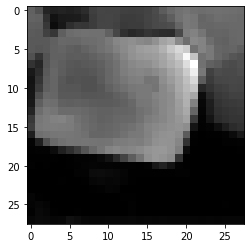

In [29]:
# testing if is working the convertion to 28x28
Fotos=pd.DataFrame(Fotos)
Foto_test=np.array(Fotos.iloc[2]).reshape(28,28)
plt.imshow(Foto_test, cmap = "gray")

In [30]:
# to get the number of columns and rows 
row,col=Fotos.shape
print(row)
print(col)

36
784


In [31]:
# using the convertion for all pictures
images28_PC=[]
for k in range(row):
  images28_PC.append(np.array(Fotos.iloc[k]).reshape(28,28))

In [32]:
x_PC=np.array(images28_PC)
logits = model(x_PC, training=False)
prediction = tf.argmax(logits, axis=1, output_type=tf.int32)
print(prediction)
''''''

tf.Tensor([3 1 1 3 2 4 2 2 4 2 2 2 1 1 2 2 2 2 3 3 3 2 4 4 3 2 2 1 4 3 3 4 4 3 4 1], shape=(36,), dtype=int32)


''

In [33]:
label=np.array(prediction) # converting tensor flow output to array output
print(label)


[3 1 1 3 2 4 2 2 4 2 2 2 1 1 2 2 2 2 3 3 3 2 4 4 3 2 2 1 4 3 3 4 4 3 4 1]


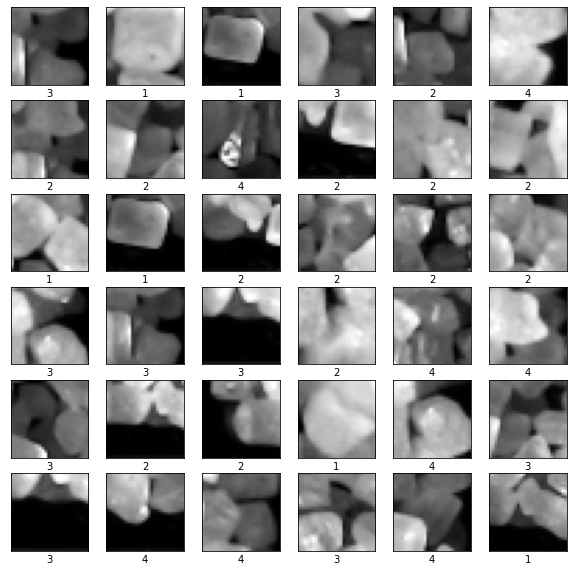

<Figure size 432x288 with 0 Axes>

In [34]:

plt.figure(figsize=(10,10))
for i in range(row):
    plt.subplot(6,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    VIEW=np.array(Fotos.iloc[i]).reshape(28,28)
    plt.imshow(VIEW, cmap = "gray")
    plt.xlabel(label[i])
plt.show()
plt.subplots_adjust(bottom=0.2, right=6, top=6,hspace=0.4, wspace=0.5)

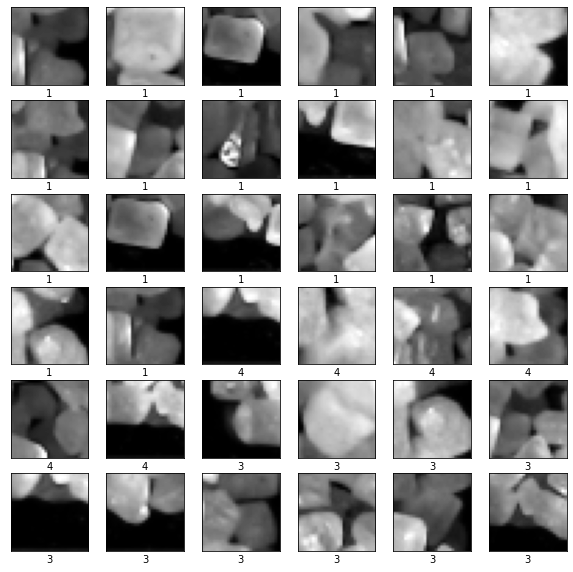

<Figure size 432x288 with 0 Axes>

In [35]:

plt.figure(figsize=(10,10))
for i in range(row):
    plt.subplot(6,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    VIEW=np.array(Fotos.iloc[i]).reshape(28,28)
    plt.imshow(VIEW, cmap = "gray")
    plt.xlabel(y_valor[i])
plt.show()
plt.subplots_adjust(bottom=0.2, right=6, top=6,hspace=0.4, wspace=0.5)

In [36]:
# just to remeber
'''
Graos='G' # numero 1
Indef='I' # numero 2
Buraco='B' # numero 3
Varios='V' # numero 4
'''

"\nGraos='G' # numero 1\nIndef='I' # numero 2\nBuraco='B' # numero 3\nVarios='V' # numero 4\n"

In [37]:

y_valor=[]


Graos='G' # numero 1
Indef='I' # numero 2
Buraco='B' # numero 3
Varios='V' # numero 4

for x in y_PC:
  if re.search('G', x):
    y_valor.append(1)
  elif re.search('I', x):
    y_valor.append(2)
  elif re.search('B', x):
    y_valor.append(3)
  else:
    y_valor.append(4)


In [38]:
data = {'y_Predicted': prediction,
        'y_Actual': y_valor
        }

df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
print (df)

    y_Actual  y_Predicted
0          2            3
1          2            1
2          1            1
3          2            3
4          2            2
5          2            4
6          2            2
7          2            2
8          2            4
9          3            2
10         2            2
11         2            2
12         2            1
13         1            1
14         3            2
15         2            2
16         2            2
17         2            2
18         2            3
19         2            3
20         3            3
21         2            2
22         2            4
23         2            4
24         2            3
25         3            2
26         3            2
27         2            1
28         1            4
29         2            3
30         3            3
31         3            4
32         2            4
33         2            3
34         2            4
35         3            1


In [39]:
confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
print (confusion_matrix)

Predicted  1  2  3  4
Actual               
1          2  0  0  1
2          3  9  7  6
3          1  4  2  1


In [40]:
'''
print(images28_B[0])
'''

'\nprint(images28_B[0])\n'